<a href="https://colab.research.google.com/github/WenhuiWang2023/springboard/blob/master/Code_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#load data
user_info = pd.read_csv("/content/drive/MyDrive/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv")
user_engage = pd.read_csv("/content/drive/MyDrive/1481069814_relax_challenge/relax_challenge/takehome_users.csv",encoding = "ISO-8859-1")

In [4]:
#Data exploration
user_engage.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
user_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
user_info.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
#check missing
user_info.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [9]:
user_engage.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

# Adopt User annotation

In [10]:
#anotation of adopt user
def adopted_user_idy(user_profile):
  nRec = user_profile.shape[0]
  #if there are less than 3 records for a user, the user is not adopt user
  if nRec < 3:
    return False
  #change the time_stamp to datetime and sort the profile by the column
  user_profile['time_stamp'] = pd.to_datetime(user_profile['time_stamp'])
  user_profile.sort_values(by='time_stamp')
  user_profile = user_profile.reset_index(drop=True)
  #go over the records for a user, check if adopt user's condition is matched. 3 records in a range of 7 days
  i = 0
  start = 0
  #print(nRec)
  end = 1
  while end < nRec-1:
    end = start+1
    dayRange = user_profile['time_stamp'][end]-user_profile['time_stamp'][start]
    #print("root:",start,":",end,":",dayRange.days)
    dayCount = 1
    while dayRange.days < 7 and end < nRec-1:
      #print(start,":",end,":",dayRange.days)
      end = end+1
      #print(start,":",end,":",nRec,":",dayRange.days)
      if dayRange.days > 0:
        dayCount = dayCount +1
      dayRange = user_profile['time_stamp'][end]-user_profile['time_stamp'][start]
    #print(dayCount)
    if dayCount >=3:
      return True
    i = i+1
    start = i
  return False

In [11]:
User_id = user_info["user_id"].unique()

In [12]:
Adopt_user = []
for i in range(len(User_id)):
  #print(i)
  user_profile = user_info.loc[user_info['user_id'] == User_id[i]]
  user_profile = user_profile.reset_index(drop=True)
  user_check = adopted_user_idy(user_profile)
  #print(i,":",user_check)
  Adopt_user.append(user_check)

<ipython-input-10-bc73f1f2203f>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_profile['time_stamp'] = pd.to_datetime(user_profile['time_stamp'])


#Find features can be used to predict adopt users

In [13]:
#Map adopt user information to user_engage dataset
adopt_user_map = dict(zip(User_id, Adopt_user))
user_engage['adopt_user'] = user_engage['object_id'].map(adopt_user_map)


In [14]:
user_engage['adopt_user'].value_counts(dropna=False)

adopt_user
False    7268
NaN      3177
True     1555
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of adopt_user')

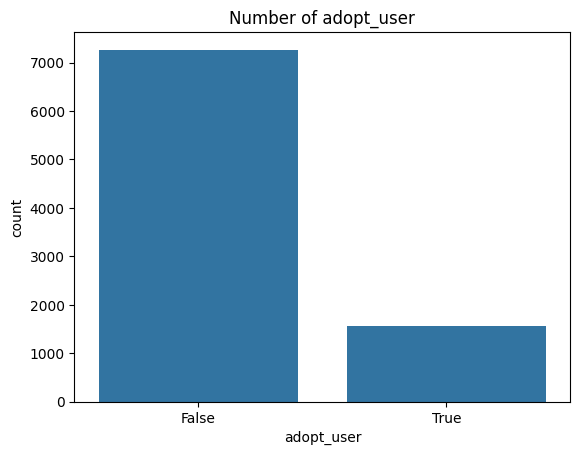

In [15]:
sns.countplot(x = 'adopt_user', data = user_engage)
plt.title("Number of adopt_user")

Text(0.5, 1.0, 'creation_source and adopt_user distribution')

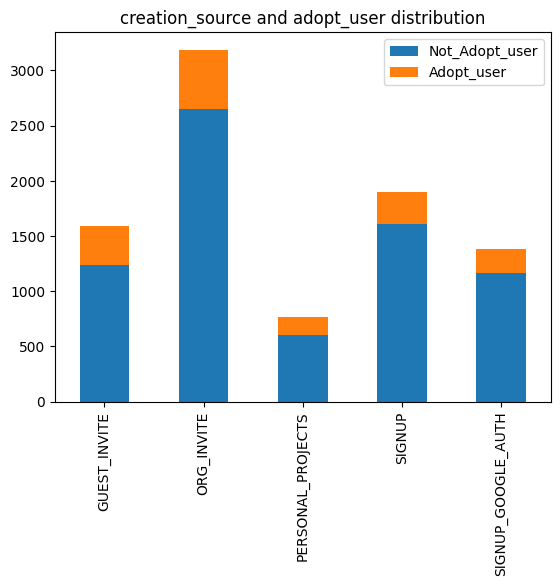

In [16]:
tmp = pd.DataFrame(np.array(user_engage.groupby(['creation_source','adopt_user']).count().reset_index()[['object_id']]).reshape(5,2))
tmp.columns = ["Not_Adopt_user","Adopt_user"]
tmp.index = ["GUEST_INVITE","ORG_INVITE","PERSONAL_PROJECTS","SIGNUP","SIGNUP_GOOGLE_AUTH"]
tmp.plot.bar(stacked=True)
plt.title("creation_source and adopt_user distribution")

We can find that different creation source have different Adopt user frenquency.Guest invite and org invite have higher frequency of adopt user. The trend indicate creation source could be an feature to predict adopt user. I use the following chi-square test to test their statistical association

In [17]:
from scipy.stats import chi2_contingency
chi2_contingency(tmp)


Chi2ContingencyResult(statistic=36.88199416540285, pvalue=1.9050012337882065e-07, dof=4, expected_freq=array([[1308.12467415,  279.87532585],
       [2626.1344214 ,  561.8655786 ],
       [ 629.34965431,  134.65034569],
       [1563.48906268,  334.51093732],
       [1140.90218746,  244.09781254]]))

chi-square test indicate that 'creation_source' statistical significantly associates with adopt user, which means creation_source is an informational featuren to predict adopt_user.

Text(0.5, 1.0, 'opted_in_to_mailing_list and adopt_user distribution')

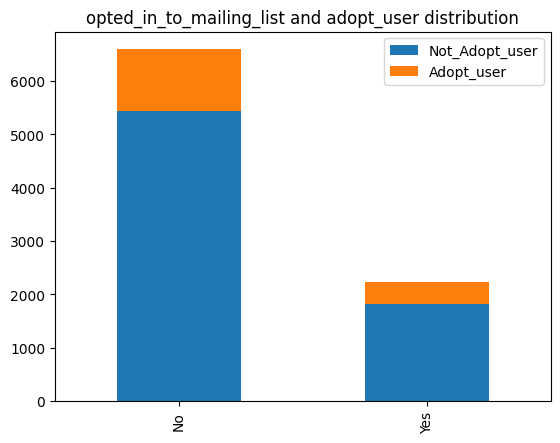

In [18]:
tmp = pd.DataFrame(np.array(user_engage.groupby(['opted_in_to_mailing_list','adopt_user']).count().reset_index()[['object_id']]).reshape(2,2))
tmp.columns = ["Not_Adopt_user","Adopt_user"]
tmp.index = ["No","Yes"]
tmp.plot.bar(stacked=True)
plt.title("opted_in_to_mailing_list and adopt_user distribution")

In [19]:
chi2_contingency(tmp)

Chi2ContingencyResult(statistic=0.34883304140617055, pvalue=0.5547744614860147, dof=1, expected_freq=array([[5434.31893914, 1162.68106086],
       [1833.68106086,  392.31893914]]))

pvalue 0.5558 indicate the feature is not associated with adopt user.

Text(0.5, 1.0, 'enabled_for_marketing_drip and adopt_user distribution')

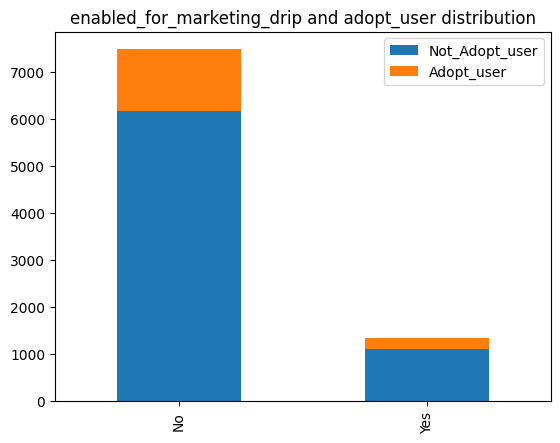

In [20]:
tmp = pd.DataFrame(np.array(user_engage.groupby(['enabled_for_marketing_drip','adopt_user']).count().reset_index()[['object_id']]).reshape(2,2))
tmp.columns = ["Not_Adopt_user","Adopt_user"]
tmp.index = ["No","Yes"]
tmp.plot.bar(stacked=True)
plt.title("enabled_for_marketing_drip and adopt_user distribution")

In [21]:
chi2_contingency(tmp)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[6163.34308058, 1318.65691942],
       [1104.65691942,  236.34308058]]))

pvalue equal to 1 indicate that there is no association to 'nabled_for_marketing_drip'

In [23]:
tmp1 = user_engage.groupby(['org_id','adopt_user']).count().reset_index()

In [24]:
tmp1 = pd.crosstab(user_engage.org_id, user_engage.adopt_user)

In [25]:
tmp1.head()

adopt_user,False,True
org_id,,
0,217,11
1,158,14
2,136,14
3,111,14
4,106,16


In [26]:
tmp1.columns = ("NotAdu","Adu")

In [27]:
tmp1["percentage"]=tmp1.apply(lambda x: (x["Adu"]/(x["Adu"]+x["NotAdu"])),axis=1)

In [28]:

tmp1.sort_values("percentage",ascending=False)

,NotAdu,Adu,percentage
org_id,,,
387,4,7,0.636364
235,4,6,0.600000
273,4,5,0.555556
117,8,8,0.500000
392,6,6,0.500000
...,...,...,...
349,15,0,0.000000
355,7,0,0.000000
362,15,0,0.000000


In [29]:
chi2_contingency(tmp1[["NotAdu","Adu"]])

Chi2ContingencyResult(statistic=536.2867248125883, pvalue=5.9675105189856656e-05, dof=416, expected_freq=array([[187.81638898,  40.18361102],
       [141.68604783,  30.31395217],
       [123.5634138 ,  26.4365862 ],
       [102.9695115 ,  22.0304885 ],
       [100.49824323,  21.50175677],
       [ 71.66678001,  15.33321999],
       [ 84.02312139,  17.97687861],
       [ 72.4905361 ,  15.5094639 ],
       [ 55.19165817,  11.80834183],
       [ 74.96180437,  16.03819563],
       [ 56.01541426,  11.98458574],
       [ 46.13034115,   9.86965885],
       [ 46.95409725,  10.04590275],
       [ 41.1878046 ,   8.8121954 ],
       [ 54.36790207,  11.63209793],
       [ 38.71653633,   8.28346367],
       [ 36.24526805,   7.75473195],
       [ 47.77785334,  10.22214666],
       [ 44.48282897,   9.51717103],
       [ 28.83146322,   6.16853678],
       [ 41.1878046 ,   8.8121954 ],
       [ 33.77399977,   7.22600023],
       [ 37.89278023,   8.10721977],
       [ 35.42151196,   7.57848804],
       

Chi-square test indicate that the orgnization they belong to associate with adopt user significantly.

In [30]:
invite_id_dict = dict(user_engage["invited_by_user_id"].value_counts())

In [31]:
user_engage['invite_user_id_pop'] = user_engage['invited_by_user_id'].map(invite_id_dict) # The popularity of invite id is defined as number of members  invited by the id

In [32]:
user_engage.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopt_user,invite_user_id_pop
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,3.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,11.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,7.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,5.0


<Axes: xlabel='adopt_user', ylabel='invite_user_id_pop'>

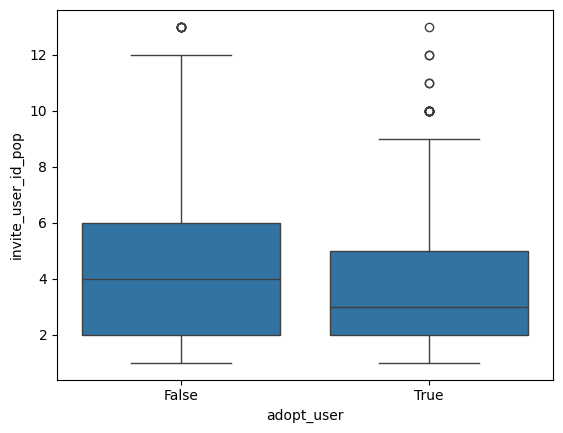

In [33]:
sns.boxplot(user_engage, x="adopt_user", y= "invite_user_id_pop" )

In [34]:
from scipy.stats import mannwhitneyu
mannwhitneyu(user_engage.loc[user_engage['adopt_user']==False,'invite_user_id_pop'].values,user_engage.loc[user_engage['adopt_user']==True,'invite_user_id_pop'].values,nan_policy='omit',alternative="greater")

MannwhitneyuResult(statistic=1769312.0, pvalue=0.1290626127805825)

invite_user_id is not associated with adopt user

<Axes: xlabel='adopt_user', ylabel='last_session_creation_time'>

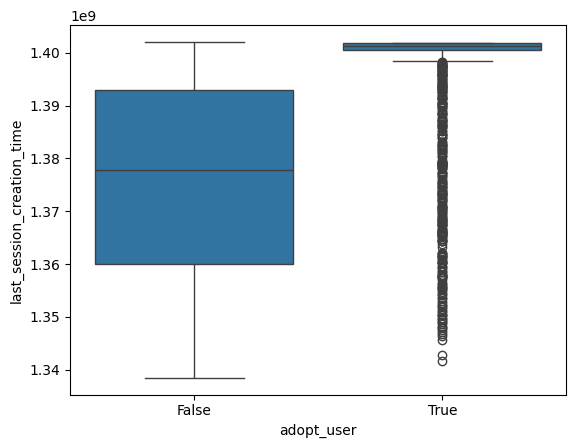

In [35]:
sns.boxplot(user_engage, x="adopt_user", y= "last_session_creation_time" )

In [37]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(user_engage.loc[user_engage['adopt_user']==False,'last_session_creation_time'].values,user_engage.loc[user_engage['adopt_user']==True,'last_session_creation_time'])

In [38]:
p_value

0.0

last_session_creation_time is signficantly higher for adopt_user comparing to not adopt_user. It is a very useful feature to predict adopt user.

**Conclusion**


1.   last_session_creation_time has the most significant association with adopt user.
2.   org_id is associated with adopt user. some org_id has much higher frequency of adopt_user than expected.
3.   creation_source is associated with adopt user. Guest_invite and org_invite has higher frequency of adopt_user.

